# Project: TMDB Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

### Question(s) for Analysis
1.Which genres are most popular from year to year?

2.What kinds of properties are associated with movies that have high revenues?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

### General Properties


In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

In [4]:
sum(df.duplicated())

1

In [5]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [8]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


### Data Cleaning
 

In [10]:
df.drop_duplicates(inplace = True)
sum(df.duplicated())

0

In [11]:
df.drop(['id', 'cast', 'homepage', 'tagline','overview', 'keywords','budget', 'revenue', 'release_date', 'imdb_id'], axis = 1, inplace = True)


In [12]:
df.head()

,popularity,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


In [13]:
df.shape

(10865, 11)

In [14]:
df.isnull().sum()

popularity                 0
original_title             0
director                  44
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [15]:
df.to_csv('df_v1.csv', index = False)

In [16]:
df_genres = df['genres'].str.split('|', expand=True)

In [17]:
df_genres

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None
...,...,...,...,...,...
10861,Documentary,None,None,None,None
10862,Action,Adventure,Drama,None,None
10863,Mystery,Comedy,None,None,None
10864,Action,Comedy,None,None,None


In [18]:
genres_out = df_genres.stack().droplevel(1).rename('genres')

In [19]:
genres_out

0                 Action
0              Adventure
0        Science Fiction
0               Thriller
1                 Action
              ...       
10863            Mystery
10863             Comedy
10864             Action
10864             Comedy
10865             Horror
Name: genres, Length: 26955, dtype: object

In [20]:
df.drop(['genres'], axis = 1, inplace = True)

In [21]:
df = pd.merge(df, genres_out, left_index=True, right_index=True)
df

,popularity,original_title,director,runtime,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres
0,32.985763,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
0,32.985763,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure
0,32.985763,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction
0,32.985763,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller
1,28.419936,Mad Max: Fury Road,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,Action
...,...,...,...,...,...,...,...,...,...,...,...
10863,0.065141,Beregis Avtomobilya,Eldar Ryazanov,94,Mosfilm,11,6.5,1966,0.000000e+00,0.000000e+00,Mystery
10863,0.065141,Beregis Avtomobilya,Eldar Ryazanov,94,Mosfilm,11,6.5,1966,0.000000e+00,0.000000e+00,Comedy
10864,0.064317,"What's Up, Tiger Lily?",Woody Allen,80,Benedict Pictures Corp.,22,5.4,1966,0.000000e+00,0.000000e+00,Action
10864,0.064317,"What's Up, Tiger Lily?",Woody Allen,80,Benedict Pictures Corp.,22,5.4,1966,0.000000e+00,0.000000e+00,Comedy


In [22]:
df.to_csv('df_genres.csv', index = False)

<a id='eda'></a>
## Exploratory Data Analysis
### Which genres are most popular from year to year?

In [23]:
df = pd.read_csv('df_genres.csv')
df.head()

,popularity,original_title,director,runtime,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres
0,32.985763,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,32.985763,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure
2,32.985763,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction
3,32.985763,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller
4,28.419936,Mad Max: Fury Road,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,Action


In [24]:
df_1 = df.groupby(['release_year', 'genres'], as_index = False)['popularity'].mean()
df_1 = df_1.sort_values(['release_year', 'popularity'], ascending = [False, False]).reset_index(drop=True)
df_1.iloc[0]

release_year         2015
genres          Adventure
popularity       3.283786
Name: 0, dtype: object

In [25]:
df_2 = pd.DataFrame()
for i in list(range(1960,2016)):
    a = df_1.query(f'release_year == {i}').head(1)
    df_2 = pd.concat([df_2, a], axis=0).reset_index(drop=True)
df_2.head()

,release_year,genres,popularity
0,1960,Thriller,0.811910
1,1961,Animation,2.631987
2,1962,Adventure,0.942513
3,1963,Animation,2.180410
4,1964,War,0.930959


In [26]:
df_2.to_csv('df_genres_v1.csv', index = False)

### What kinds of properties are associated with movies that have high revenues?


In [27]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


In [28]:
df = pd.read_csv('df_genres.csv')
df.head()


,popularity,original_title,director,runtime,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres
0,32.985763,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,32.985763,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure
2,32.985763,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction
3,32.985763,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller
4,28.419936,Mad Max: Fury Road,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,Action


In [29]:
df['revenue_adj'].describe()

count    2.695500e+04
mean     6.088986e+07
std      1.615305e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.376460e+07
max      2.827124e+09
Name: revenue_adj, dtype: float64

In [30]:
df = df[df.revenue_adj != 0]

In [31]:
df['revenue_adj'].describe()

count    1.266400e+04
mean     1.296025e+08
std      2.159459e+08
min      2.370705e+00
25%      1.323018e+07
50%      5.083352e+07
75%      1.526580e+08
max      2.827124e+09
Name: revenue_adj, dtype: float64

In [32]:
df.to_csv('df_genres_v2.csv', index = False)

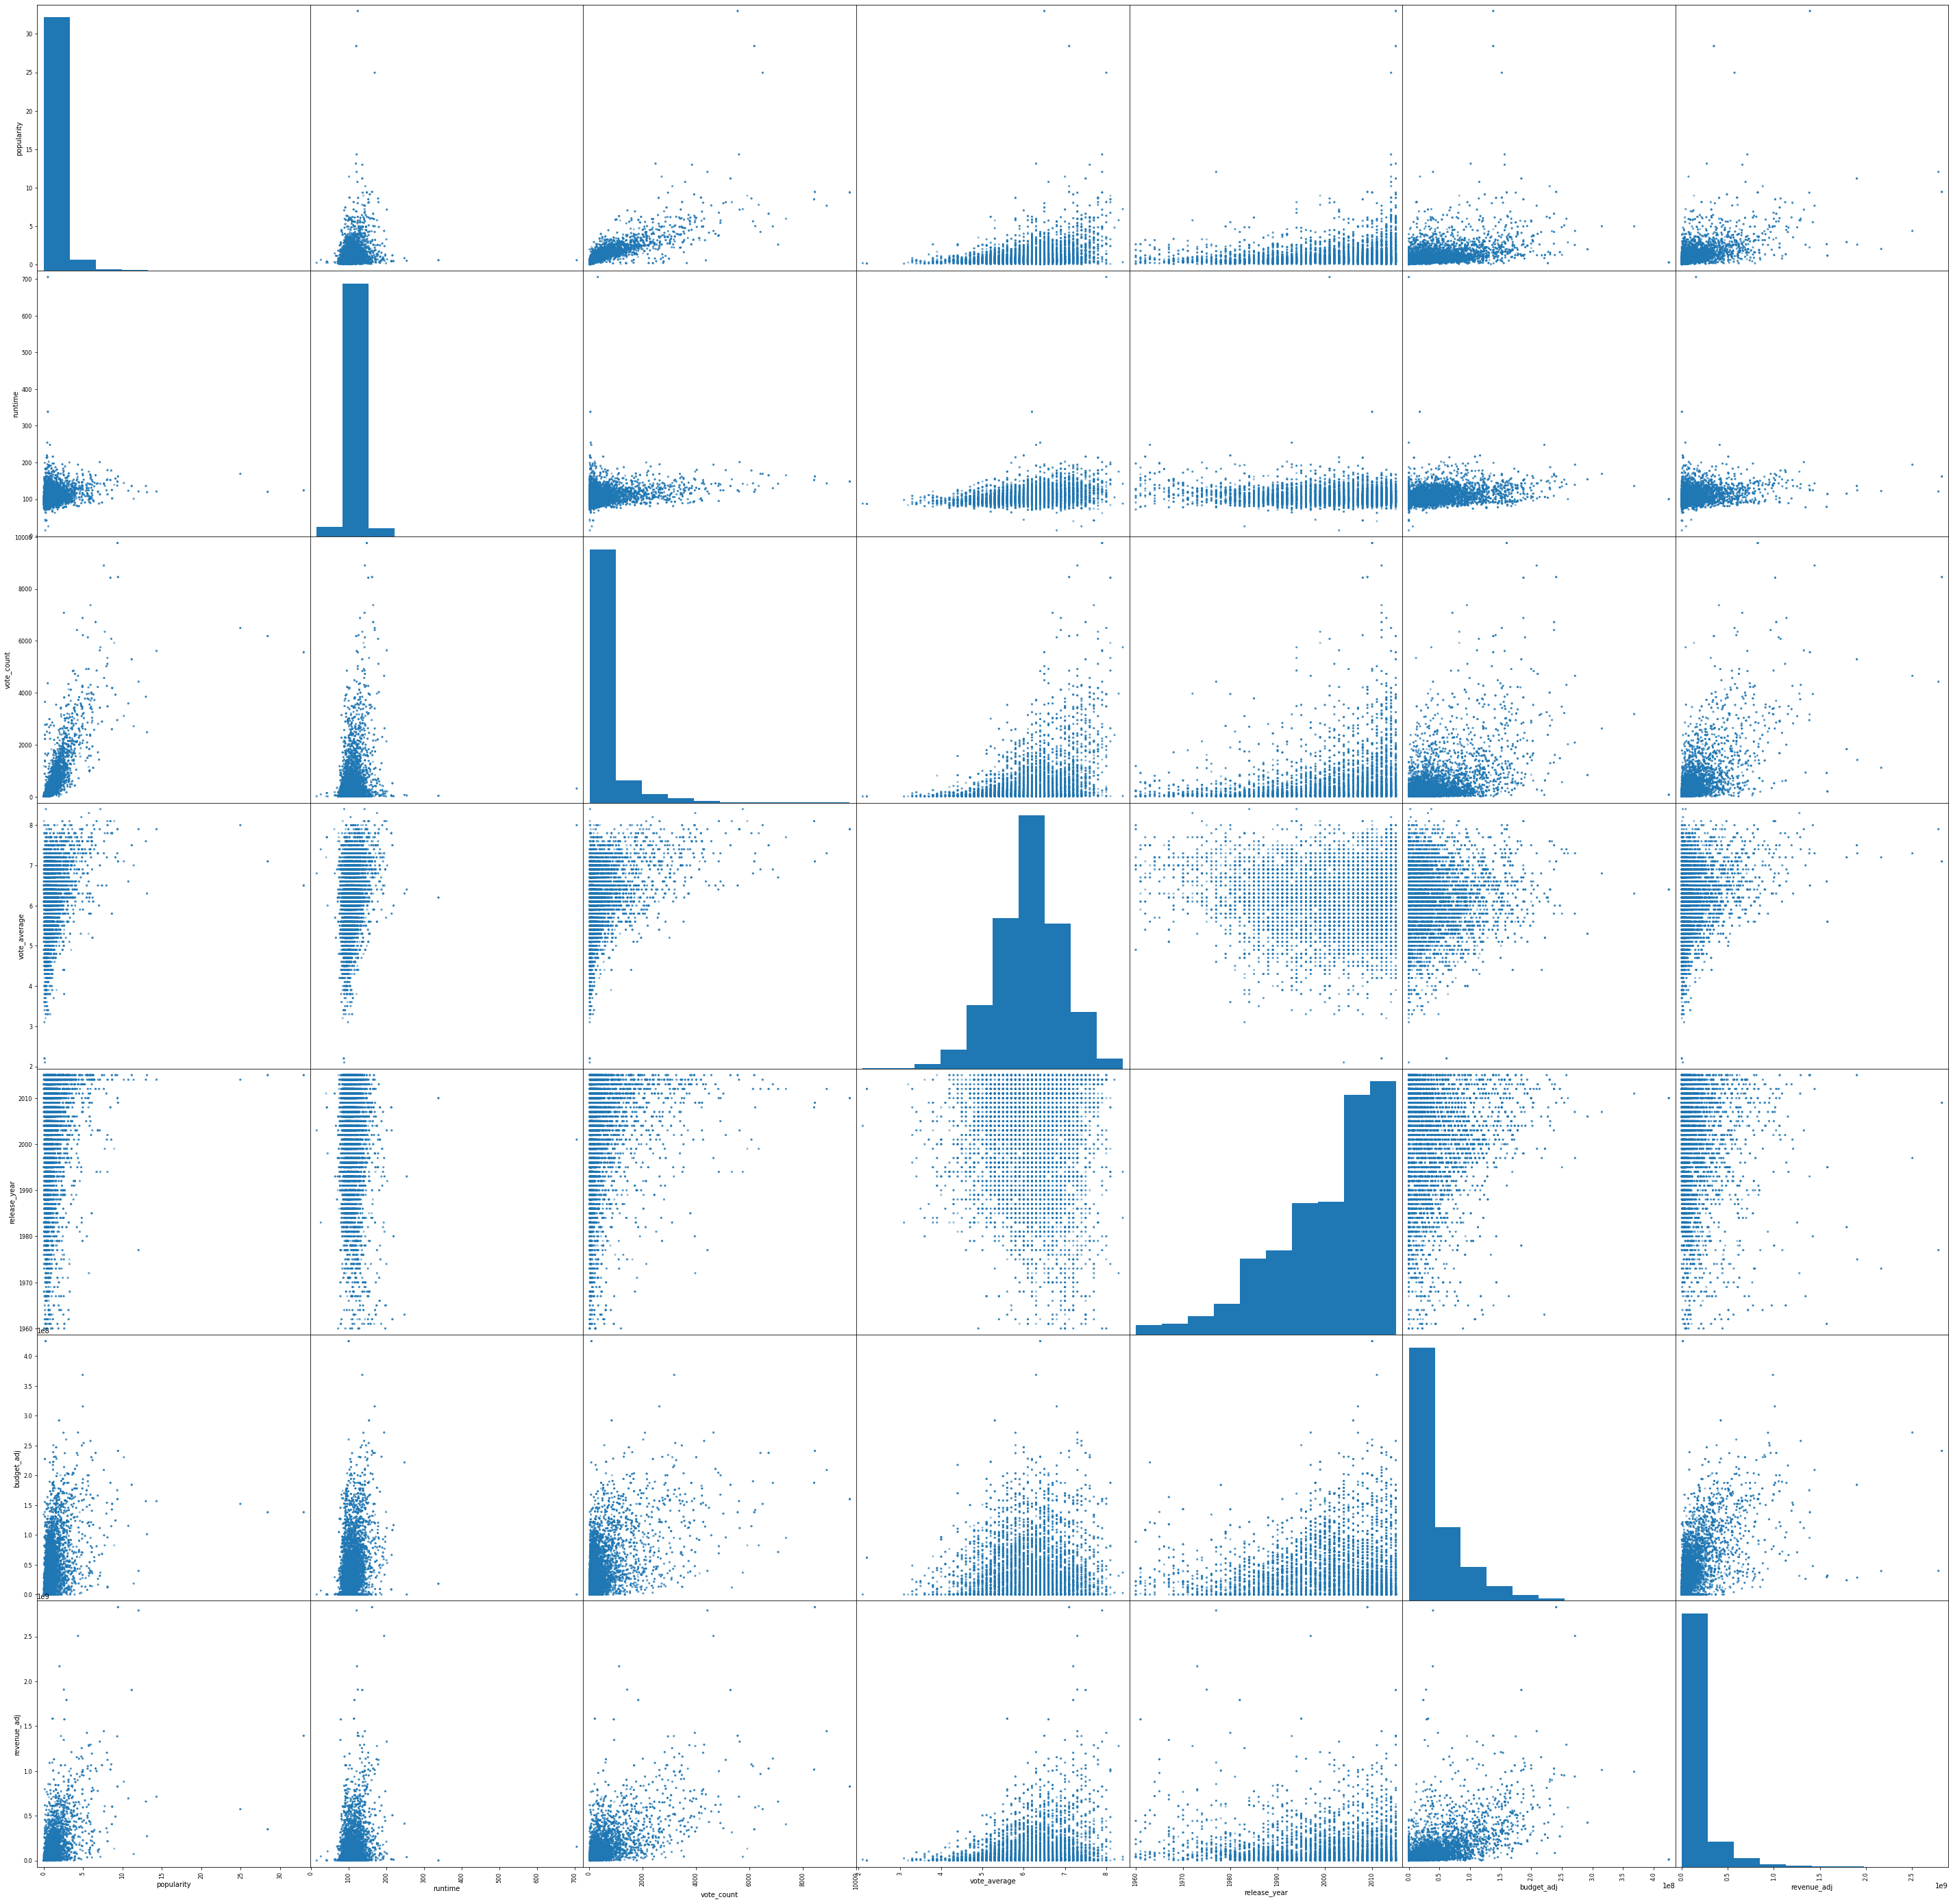

In [33]:
pd.plotting.scatter_matrix(df, figsize = (50,50));

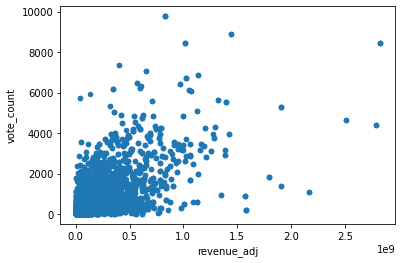

In [34]:
df.plot(y='vote_count', x= 'revenue_adj', kind = 'scatter');

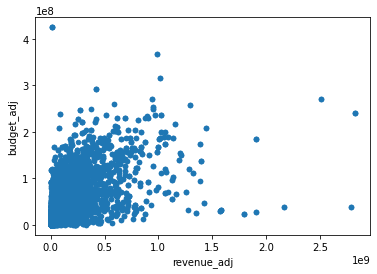

In [35]:
df[df.budget_adj != 0].plot(y='budget_adj', x= 'revenue_adj', kind = 'scatter');

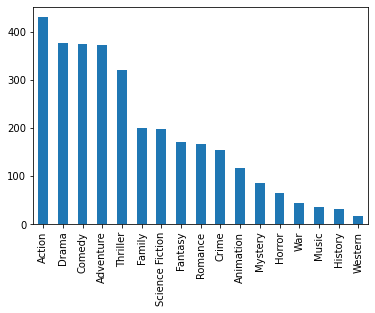

In [36]:
df_g = df.query('revenue_adj >= 1.526580e+08')
df_g['genres'].value_counts().plot(kind = 'bar');

In [37]:
df_g['director'].value_counts().describe()

count    517.000000
mean       6.123791
std        5.964702
min        1.000000
25%        3.000000
50%        4.000000
75%        7.000000
max       56.000000
Name: director, dtype: float64

<a id='conclusions'></a>
## Conclusions


### Q1: Which genres are most popular from year to year?

In [38]:
df = pd.read_csv('df_genres_v1.csv')

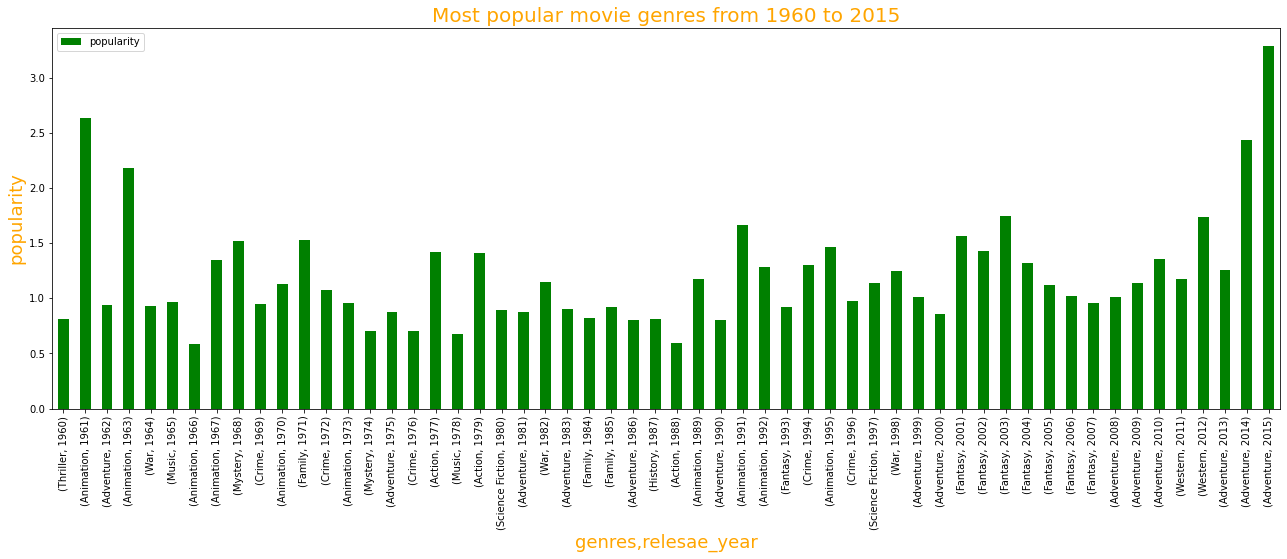

In [39]:
df_2.set_index(['genres','release_year']).plot(kind = 'bar', figsize = (22,7), color= 'green')
plt.xlabel('genres,relesae_year', fontsize=18, color = 'orange')
plt.ylabel('popularity', fontsize = 18, color = 'orange')
plt.legend()
plt.title('Most popular movie genres from 1960 to 2015',fontsize = 20, color = 'orange');

### Q2: What kinds of properties are associated with movies that have high revenues?


In [40]:
df = pd.read_csv('df_genres_v2.csv')

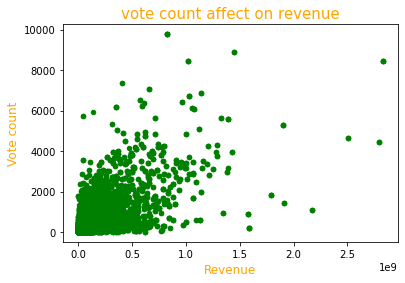

In [41]:
# Positive correlation betwwen vote count and revenue
df.plot(y='vote_count', x= 'revenue_adj', kind = 'scatter', color = 'green')
plt.title('vote count affect on revenue', fontsize = 15, color = 'orange')
plt.xlabel('Revenue', fontsize=12, color = 'orange')
plt.ylabel('Vote count', fontsize = 12, color = 'orange');

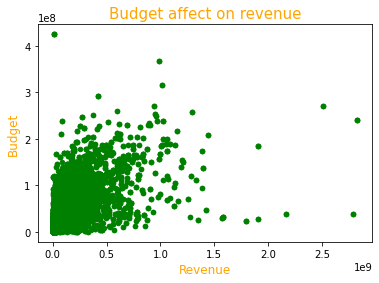

In [42]:
#Positive correlation betwwen Budget and revenue
df[df.budget_adj != 0].plot(y='budget_adj', x= 'revenue_adj', kind = 'scatter', color = 'green');
plt.title('Budget affect on revenue', fontsize = 15, color = 'orange')
plt.xlabel('Revenue', fontsize=12, color = 'orange')
plt.ylabel('Budget', fontsize = 12, color = 'orange');

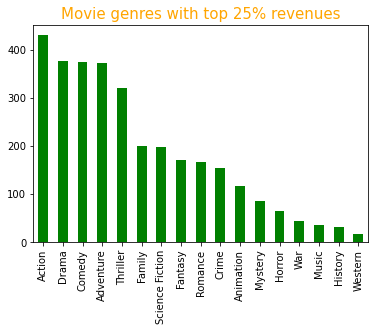

In [43]:
# bar chart shows that relation between movie genres and top 25% movie revenues
df_g = df.query('revenue_adj >= 1.526580e+08')
df_g['genres'].value_counts().plot(kind = 'bar', color = 'green')
plt.title('Movie genres with top 25% revenues', fontsize = 15, color = 'orange');

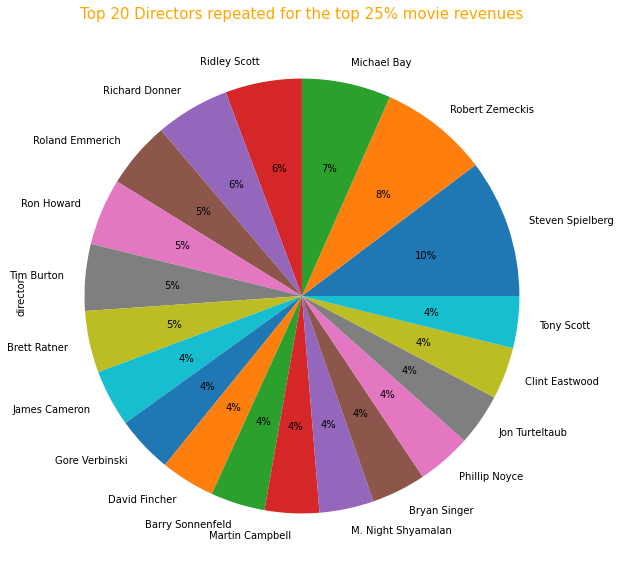

In [44]:
# repetation of directors for highest revenue movies shows that the director effect on revenue
df_g['director'].value_counts().head(20).plot(kind = 'pie',figsize = (10,10),autopct='%1.0f%%')
plt.title('Top 20 Directors repeated for the top 25% movie revenues', fontsize = 15, color = 'orange');